# Prepare the workspace - load Keras, Tensorflow

In [ ]:
from __future__ import print_function
import keras
from keras import utils
from keras.utils import plot_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt



# Set the seed to ensure reproducibility for the assignment

In [ ]:
keras.utils.set_random_seed(0)
import tensorflow as tf
tf.config.experimental.enable_op_determinism()

# Import the MNIST dataset + create variables for our test and training data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# CNN specific shape of the data

In [ ]:
# input image dimensions of MNIST data
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Preprocess the data
Note we do not shape it into a 1D vector of size 28*28 = 784 here, but rather keep the images as 28 x 28 x 1 to be used with 2D convolution layer.

Compare this preprocessing steps in the code MNIST_HelloWorld_DLinR code!

In [ ]:
# rescale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


## The y data is an integer vector with values ranging from 0 to 9.  To prepare this data for training we one-hot encode the vectors into binary class matrices

In [ ]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


# Build the model
Building the neural network requires configuring the layers of the model then compiling the model.

# Setup the layers

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
#project 3 : Add the two layers should be added here to run the full code!
#model.add(Conv2D())
#model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Print the details of the model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

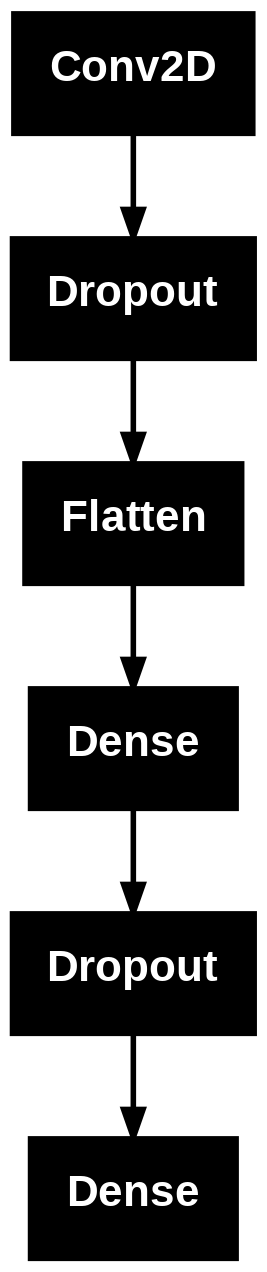

In [ ]:
#keras.utils.print_summary(model)
model.summary()
# You can also plot instead
keras.utils.plot_model(model)

Number of original Training Params: 2,770,634
Project 3 training params: 600,810



# Compile the model - define loss and optimizer

In [ ]:
model.compile(
  loss= 'categorical_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy']
  )

# Train the model

In [ ]:
history = model.fit(
  x_train, y_train,
  epochs=30, batch_size=128,
  validation_split=0.2
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8528 - loss: 0.4766 - val_accuracy: 0.9767 - val_loss: 0.0842
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9702 - loss: 0.0987 - val_accuracy: 0.9804 - val_loss: 0.0672
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9799 - loss: 0.0651 - val_accuracy: 0.9818 - val_loss: 0.0619
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9842 - loss: 0.0504 - val_accuracy: 0.9845 - val_loss: 0.0557
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9870 - loss: 0.0400 - val_accuracy: 0.9843 - val_loss: 0.0570
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9883 - loss: 0.0351 - val_accuracy: 0.9851 - val_loss: 0.0545
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9917 - loss: 0.0267 - val_accuracy: 0.9850 - val_loss: 0.0594
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9926 - loss: 0.0245 - val_accuracy: 0.

## The history object returned by fit() includes loss and accuracy metrics which we can plot

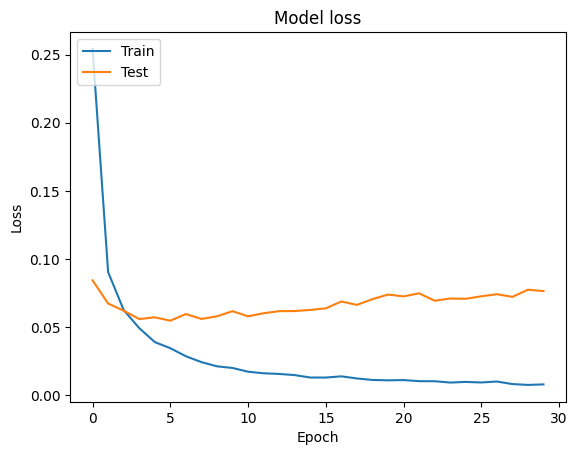

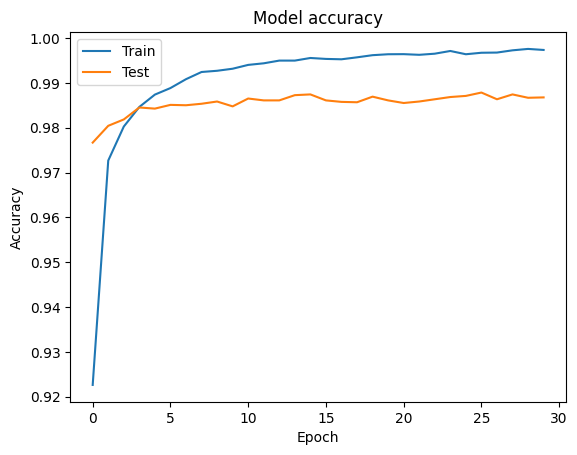

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### evaulating result

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07123339176177979
Test accuracy: 0.98580002784729


Accuracy Increased

# Project 3
## Add two layers after the initial convolutional layer in "Setup the layers" above
1. Convolutional layer with kernel size 3 x 3 with relu
2. Maxpool layer with size 2 x 2
### Submit the code chunk below
It should be of the form:

---
```
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Your convolutional layer here!)
model.add(Your maxpool layer here!)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
```
---

## Make sure you ran the full code with these two additional layers added, and report the final training accuracy value, test accuracy value.


# Q1

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D()) # default is 2x2
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Q2

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 600,810 (2.29 MB)

 Trainable params: 600,810 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

# Q3


Number of original Training Params: 2,770,634

After adding the layers, the number of trainable params decreases to: 600,810


The number of params decreases because of the max_pooling layer which decreases the number of inputs into the dense_2 layer (which is where most of the trainable parameters come from).


# Q4

In [ ]:
model.compile(
  loss= 'categorical_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy']
  )

history = model.fit(
  x_train, y_train,
  epochs=30, batch_size=128, # 30 epochs
  validation_split=0.2
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8385 - loss: 0.5157 - val_accuracy: 0.9787 - val_loss: 0.0738
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9720 - loss: 0.0920 - val_accuracy: 0.9864 - val_loss: 0.0488
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9796 - loss: 0.0663 - val_accuracy: 0.9862 - val_loss: 0.0476
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9838 - loss: 0.0520 - val_accuracy: 0.9877 - val_loss: 0.0427
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9866 - loss: 0.0415 - val_accuracy: 0.9880 - val_loss: 0.0409
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9880 - loss: 0.0376 - val_accuracy: 0.9893 - val_loss: 0.0408
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9890 - loss: 0.0338 - val_accuracy: 0.9885 - val_loss: 0.0414
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9891 - loss: 0.0322 - val_accuracy: 

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Training loss: 0.009023167192935944
Training accuracy: 0.997783362865448
Test loss: 0.03298281505703926
Test accuracy: 0.9918000102043152


The final accuracy did increase after adding the two layers (though only slightly). In the original network, the final model after training was slightly overfit (the accuracy lines cross in the plot), while the model after adding the two layers is less overfit, though still slightly overfit.


| Training Accuracy | Test Accuracy |
|-------------------|---------------|
| 99.78%            | 99.18%        |